# Exploratory Data Analysis (EDA) - Gene Ontology (GO) Terms


In this notebook, we will perform an Exploratory Data Analysis (EDA) on the gene ontology terms associated with the sequences in the train dataset. The gene ontology terms provide functional annotations to the sequences, allowing us to gain insights into the biological processes, cellular components, and molecular functions associated with the sequences.

## Dataset Overview

The analysis will be based on the following files:

- `train_terms.tsv`: This file contains the gene ontology terms associated with each sequence in the train dataset. The terms are represented as a tab-separated values (TSV) file, where each row corresponds to a sequence and the associated gene ontology terms are listed.
- `go-basic.obo`: This file contains the ontology data in the GO graph structure. The GO graph represents the hierarchical relationships between gene ontology terms, providing information about the parent-child relationships and the overall structure of the gene ontology.

## Goals of the Analysis

The main goals of this analysis are:

1. Analyze the distribution of GO terms across the sequences to understand the functional annotations present in the dataset.
2. Identify the most common or prevalent GO terms to gain insights into the dominant functional annotations.
3. Explore the relationships and dependencies between GO terms using the GO graph structure to uncover the hierarchical organization of functional annotations.

## Approach

To achieve these goals, we will perform various exploratory data analysis techniques, including data visualization and statistical analysis. We will use Python and relevant libraries such as pandas, matplotlib, and networkx to load, process, and analyze the data.

Let's begin the analysis and delve into the gene ontology terms associated with the sequences in the train dataset!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cafa-5-protein-function-prediction/sample_submission.tsv
/kaggle/input/cafa-5-protein-function-prediction/IA.txt
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta
/kaggle/input/cafa-5-protein-function-prediction/Train/train_taxonomy.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo


In [2]:
import pandas as pd

train_terms_df = pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv', delimiter='\t')
go_terms_df = pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv', delimiter='\t')


In [3]:
# Perform initial data exploration
print("Number of rows:", len(train_terms_df))
print("Number of columns:", len(train_terms_df.columns))
print("Data types:")
print(train_terms_df.dtypes)
print("Missing values:")
print(train_terms_df.isnull().sum())

# Sample the first few rows of the DataFrame
print("Sample data:")
print(train_terms_df.head())


Number of rows: 5363863
Number of columns: 3
Data types:
EntryID    object
term       object
aspect     object
dtype: object
Missing values:
EntryID    0
term       0
aspect     0
dtype: int64
Sample data:
      EntryID        term aspect
0  A0A009IHW8  GO:0008152    BPO
1  A0A009IHW8  GO:0034655    BPO
2  A0A009IHW8  GO:0072523    BPO
3  A0A009IHW8  GO:0044270    BPO
4  A0A009IHW8  GO:0006753    BPO


We can see that the dataset consists of 5,363,863 rows and 3 columns. The columns are labeled as EntryID, term, and aspect, with each column having an object data type.

Furthermore, there are no missing values in any of the columns, as indicated by the count of 0 for each column.

The sample data shows a subset of the dataset, displaying the EntryID, term, and aspect values for five rows.

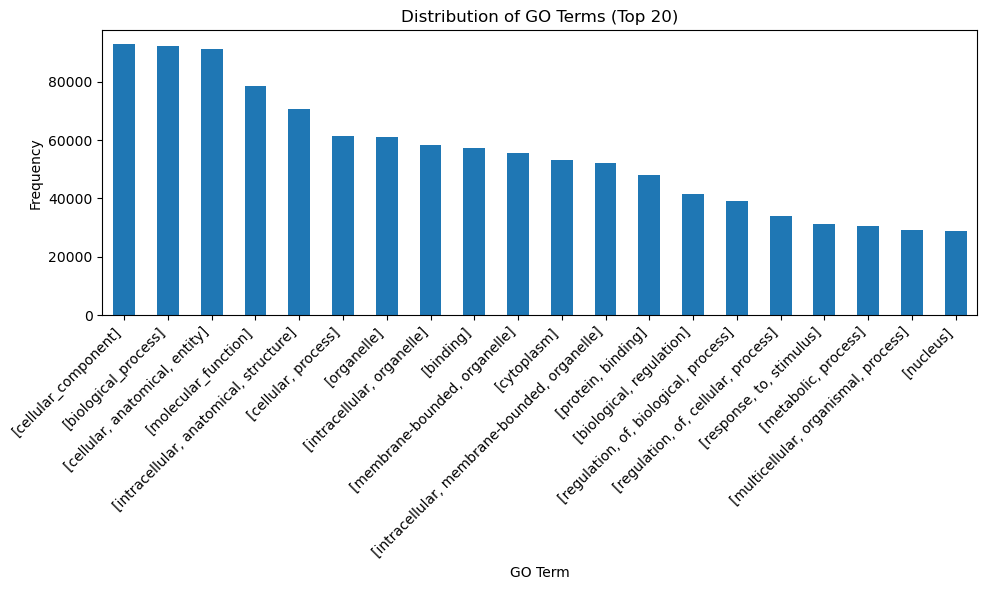

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the train_terms.tsv file into a DataFrame
data = pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv', sep='\t')

# Calculate the frequency of different GO terms
go_term_counts = data['term'].value_counts()

# Read the go-basic.obo file and extract the mapping of term codes to names
go_terms_mapping = {}
with open('/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo', 'r') as file:
    for line in file:
        if line.startswith('id:'):
            term_code = line.strip().split(' ')[-1]
        elif line.startswith('name:'):
            term_name = line.strip().split(' ')[1:]
            go_terms_mapping[term_code] = term_name

# Replace the term codes in the index of go_term_counts with the corresponding term names
go_term_counts.index = go_term_counts.index.map(go_terms_mapping)

# Plot the distribution of GO terms using a bar plot
plt.figure(figsize=(10, 6))
go_term_counts.head(20).plot(kind='bar')
plt.xlabel('GO Term')
plt.ylabel('Frequency')
plt.title('Distribution of GO Terms (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
go_term_counts.head(20)

[cellular_component]                            92912
[biological_process]                            92210
[cellular, anatomical, entity]                  91286
[molecular_function]                            78637
[intracellular, anatomical, structure]          70785
[cellular, process]                             61293
[organelle]                                     60883
[intracellular, organelle]                      58315
[binding]                                       57380
[membrane-bounded, organelle]                   55452
[cytoplasm]                                     53193
[intracellular, membrane-bounded, organelle]    52218
[protein, binding]                              47987
[biological, regulation]                        41457
[regulation, of, biological, process]           39256
[regulation, of, cellular, process]             33888
[response, to, stimulus]                        31098
[metabolic, process]                            30448
[multicellular, organismal, 

These terms represent different functional categories such as cellular components, biological processes, and molecular functions. Here are some observations and possible next steps based on the prevalent terms:

1. **Cellular Component**: The terms related to cellular components are highly prevalent, indicating that the dataset contains a significant focus on the organization and localization of cellular structures.
2. **Biological Process**: Similarly, the prevalence of terms related to biological processes suggests that the dataset covers a diverse range of biological activities and functions.
3. **Molecular Function**: Molecular function terms indicate the types of activities performed by individual molecules, such as binding, catalysis, or receptor activity.
4. **Intracellular Structures and Organelles**: Terms related to intracellular structures and organelles are prominent, emphasizing the importance of studying the internal organization and functions of cells.

Based on these prevalent terms, some possible next steps could include:

1. **Further Exploration of Specific Functional Categories**: Dive deeper into specific functional categories by analyzing their distributions, exploring relationships between different terms within a category, and investigating their associations with other variables of interest.
2. **Functional Enrichment Analysis**: Perform functional enrichment analysis to identify overrepresented or enriched functional categories within the dataset. This analysis can provide insights into the functional significance of the dataset and potentially reveal underlying biological processes or pathways.
3. **Comparative Analysis**: Compare the distribution of GO terms across different subsets or categories within the dataset. This analysis can help identify differences or similarities in functional annotations among different groups or conditions.

In [6]:
unique_categories = go_terms_df['term'].unique()
print(unique_categories)

['GO:0008152' 'GO:0034655' 'GO:0072523' ... 'GO:0102626' 'GO:0102627'
 'GO:0102628']


In [7]:
category_counts = data['term'].value_counts()
print(category_counts)

GO:0005575    92912
GO:0008150    92210
GO:0110165    91286
GO:0003674    78637
GO:0005622    70785
              ...  
GO:0031772        1
GO:0042324        1
GO:0031771        1
GO:0051041        1
GO:0102628        1
Name: term, Length: 31466, dtype: int64


The unique values in the "category" column are represented by the GO term codes, such as 'GO:0008152', 'GO:0034655', etc. Instead of having explicit category names, the dataset contains the GO term codes as categories.

To investigate the data further and understand the distribution and availability of GO terms, we can follow these steps:

1. Convert GO term codes to category names

2. Analyze the distribution of GO terms

In [8]:
!pip install goatools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.1 MB/s eta 0:00:00


In [9]:
import requests
from goatools import obo_parser

# Download the OBO file if not already downloaded
obo_file_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
obo_file_path = '/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo'


# Load the GO graph from the OBO file
go_graph = obo_parser.GODag(obo_file_path)

# Create a dictionary with term names and their IDs
go_names_dict = {go_id: go_term.name for go_id, go_term in go_graph.items()}


FileNotFoundError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.10/site-packages/numpy-1.24.3.dist-info/METADATA'

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Flatten the list of term names
term_names = [term for terms in go_terms_mapping.values() for term in terms]

# Count the frequency of each term name
term_counts = Counter(term_names)

# Convert term names and frequencies to a dictionary
term_freq_dict = {term: frequency for term, frequency in term_counts.items()}
del term_freq_dict['of']
del term_freq_dict['to']
del term_freq_dict['in']
del term_freq_dict['or']
del term_freq_dict['by']
del term_freq_dict['into']

# Generate word cloud using term names and frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_freq_dict)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribution of GO Terms')
plt.show()


In [ ]:
# Get the top 20 words excluding 'of', 'in', and 'to'
top_words = [word for word in term_counts.most_common(23) if word[0] not in ['of', 'in', 'to']]
top_word_labels = [word[0] for word in top_words[:20]]
top_word_counts = [word[1] for word in top_words[:20]]

# Create a bar plot of the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_word_labels)), top_word_counts)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Top 20 Words (Excluding "of", "in", and "to")')
plt.xticks(range(len(top_word_labels)), top_word_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


Lets look at a random Go Term:

In [ ]:
go_term = 'GO:0005575'  
max_child_terms = 10  # Maximum number of child terms to display

# Retrieve the GO term from the GO graph
term = go_graph.get(go_term)

if term is not None:
    # Get the immediate parent terms
    parent_terms = []
    for parent_term_id in term.get_all_parents():
        parent_term = go_graph.get(parent_term_id)
        if parent_term is not None:
            parent_terms.append(parent_term.name)

    # Get the immediate child terms
    child_terms = []
    for child_term_id in term.get_all_children():
        child_term = go_graph.get(child_term_id)
        if child_term is not None:
            child_terms.append(child_term.name)

    # Print the information
    print("GO Term:", go_term)
    print("Term Name:", term.name)
    print("Immediate Parents:")
    if parent_terms:
        print("\n".join(parent_terms))
    else:
        print("None")
    print("Immediate Children:")
    if child_terms:
        if len(child_terms) <= max_child_terms:
            print("\n".join(child_terms))
        else:
            print("\n".join(child_terms[:max_child_terms]) + f"\n... and {len(child_terms) - max_child_terms} more")
    else:
        print("None")
    print("-" * 50)
else:
    print("GO term not found in the GO graph.")



Lets categorize the GO terms based on their namespaces (biological process, molecular function, cellular component) and display the top few GO terms within each category. Remember that GO terms represent functional annotations associated with genes or gene products, describing their biological processes, molecular functions, or cellular components.

To do so, we'll get an overview of the distribution of GO terms across different functional categories. By categorizing and displaying the top GO terms within each category, we can gain insights into the prevalent functional annotations in the dataset and better understand the functional landscape of the proteins.

In [ ]:
from goatools.obo_parser import GODag
from collections import defaultdict

def get_go_categories(go_graph):
    categories = defaultdict(list)
    for go_id, go_term in go_graph.items():
        for parent_id in go_term.parents:
            if parent_id in go_graph:
                parent_term = go_graph[parent_id]
                if parent_term.namespace != go_term.namespace:
                    categories[parent_id].append(go_id)
    return categories


# Load the GO graph from the OBO file
#go_graph = GODag('go-basic.obo')

# Derive categories from the GO graph
categories = get_go_categories(go_graph)


In [ ]:
from collections import defaultdict

# Derive categories from the GO graph
categories = defaultdict(list)

for go_id, go_term in go_graph.items():
    if go_term.namespace == 'biological_process':
        categories['Biological Process'].append(go_term.name)
    elif go_term.namespace == 'molecular_function':
        categories['Molecular Function'].append(go_term.name)
    elif go_term.namespace == 'cellular_component':
        categories['Cellular Component'].append(go_term.name)

# Define the number of top GO terms to display per category
top_n = 10

# Sort the terms within each category by prevalence in the go_term dataframe
for category, go_terms in categories.items():
    go_terms_sorted = sorted(go_terms, key=lambda x: go_term_counts.get(x, 0), reverse=True)
    print(f"Category: {category}")
    print("Top GO Terms:")
    for go_term in go_terms_sorted[:top_n]:
        print(go_term)
    print("-" * 50)

